In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

In [3]:
d_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
d_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
d_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
d_train.shape

(1460, 81)

In [6]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
d_train.isna().sum().sort_values(ascending=False).head(20)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [8]:
d_train['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [9]:
len(d_train)

1460

In [10]:
df = d_train.isnull().sum().sum()
missing_val_percentage = len(d_train)/df
missing_val_percentage

0.2096195262024408

<AxesSubplot:>

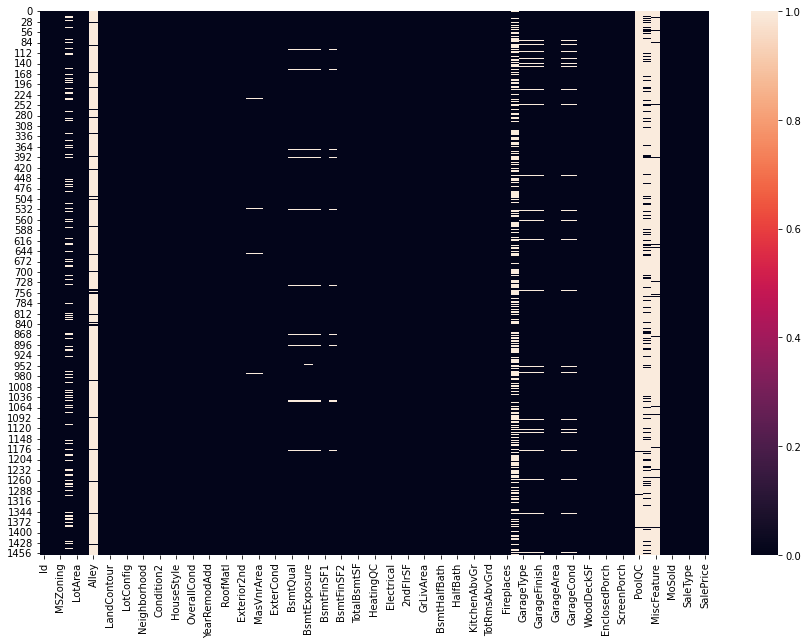

In [11]:
# Missing Value Visuilization 
plt.figure(figsize = (15,10))
sns.heatmap(d_train.isnull())

In [12]:

d_train['GarageCond'] = d_train['GarageCond'].fillna(d_train['GarageCond'].value_counts().idxmax())
d_train['GarageType'] = d_train['GarageType'].fillna(d_train['GarageType'].value_counts().idxmax())
d_train['GarageFinish'] = d_train['GarageFinish'].fillna(d_train['GarageFinish'].value_counts().idxmax())
d_train['GarageQual'] = d_train['GarageQual'].fillna(d_train['GarageQual'].value_counts().idxmax())
d_train['BsmtFinType2'] = d_train['BsmtFinType2'].fillna(d_train['BsmtFinType2'].value_counts().idxmax())
d_train['BsmtExposure'] = d_train['BsmtExposure'].fillna(d_train['BsmtExposure'].value_counts().idxmax())
d_train['BsmtQual'] = d_train['BsmtQual'].fillna(d_train['BsmtQual'].value_counts().idxmax())
d_train['BsmtCond'] = d_train['BsmtCond'].fillna(d_train['BsmtCond'].value_counts().idxmax())
d_train['BsmtFinType1'] = d_train['BsmtFinType1'].fillna(d_train['BsmtFinType1'].value_counts().idxmax())
d_train['MasVnrType'] = d_train['MasVnrType'].fillna(d_train['MasVnrType'].value_counts().idxmax())
d_train['Electrical'] = d_train['Electrical'].fillna(d_train['Electrical'].value_counts().idxmax())

In [13]:
d_train['LotFrontage'] = d_train['LotFrontage'].fillna(d_train['LotFrontage'].mean())

In [14]:
d_train=d_train.drop(['MiscFeature','Fence','PoolQC','Alley','FireplaceQu'],axis=1)

In [15]:

d_train['GarageYrBlt']= d_train['GarageYrBlt'].fillna(0)
d_train['MasVnrArea']= d_train['MasVnrArea'].fillna(0)

In [16]:
numeric_features = d_train.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
discrete_feature=[feature for feature in numeric_features if len(d_train[feature].unique())<25]

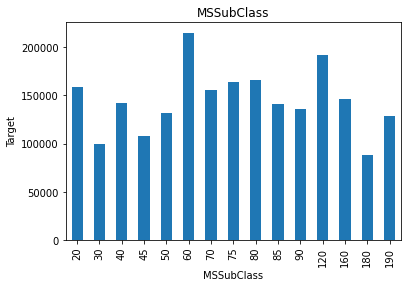

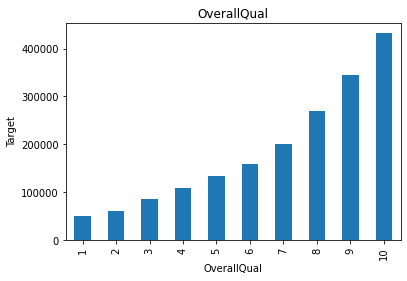

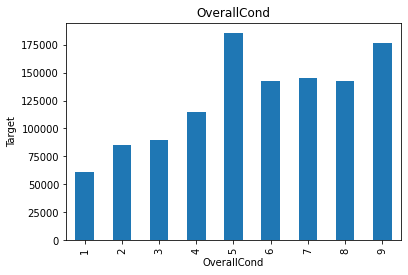

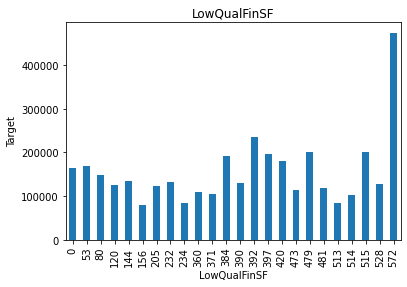

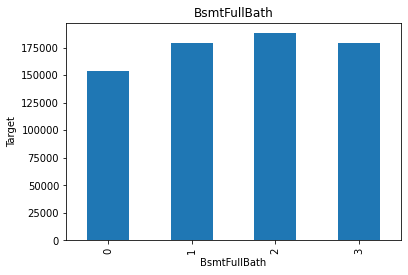

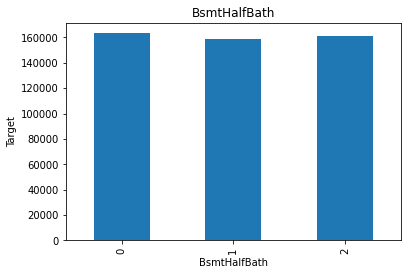

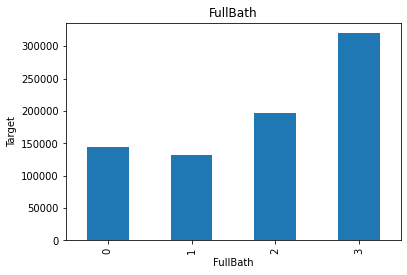

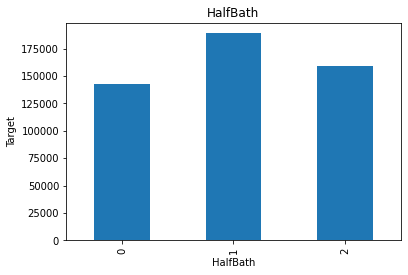

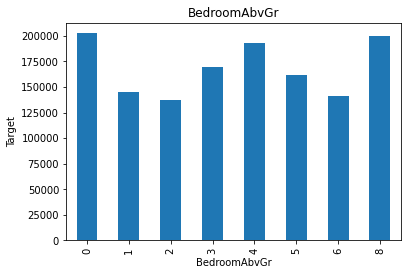

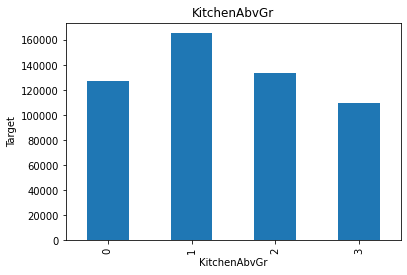

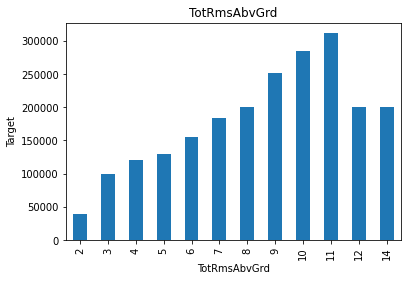

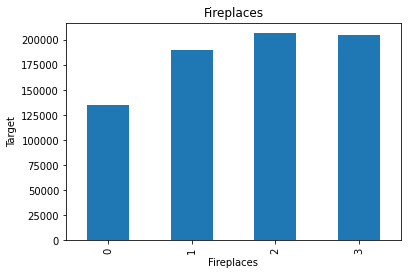

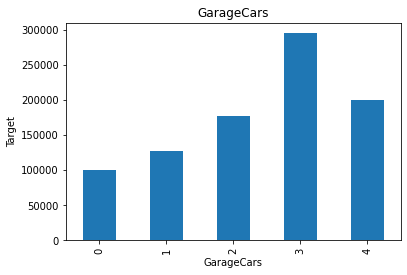

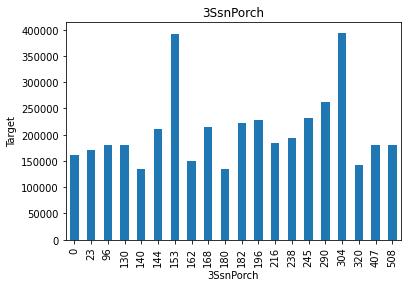

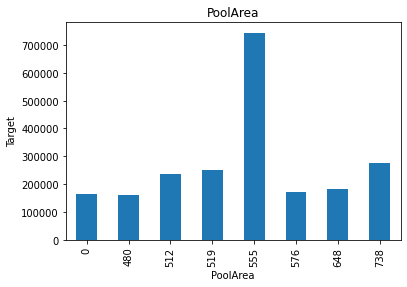

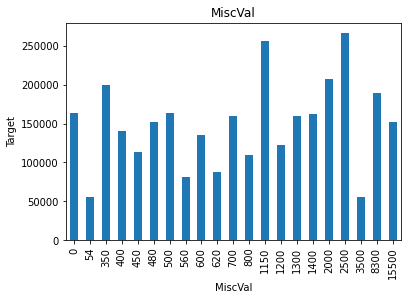

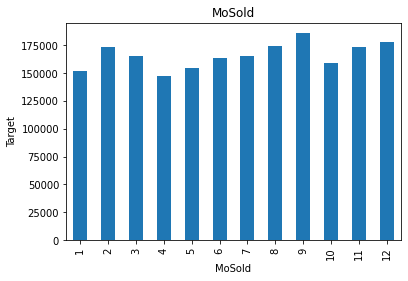

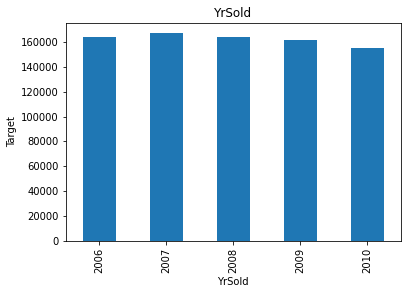

In [18]:
for feature in discrete_feature:
    data=d_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.title(feature)
    plt.show()

In [19]:
continuous_feature=[feature for feature in numeric_features if feature not in discrete_feature]

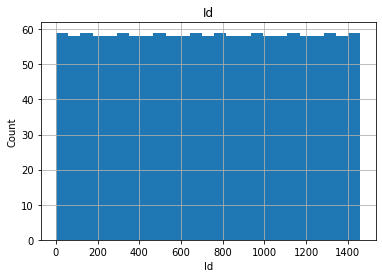

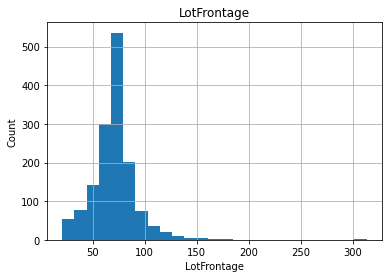

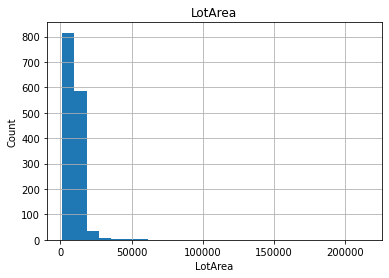

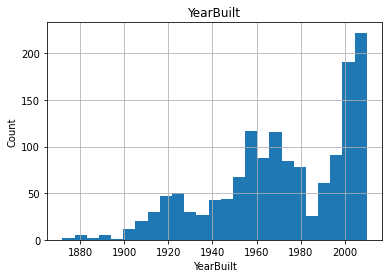

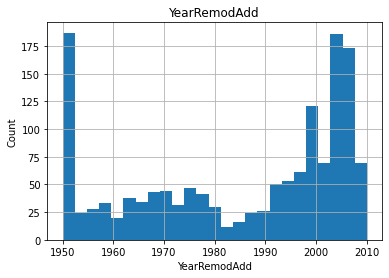

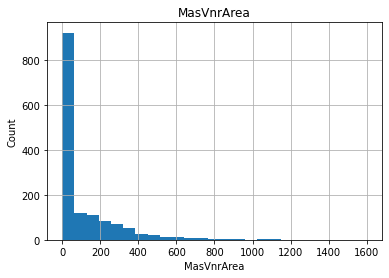

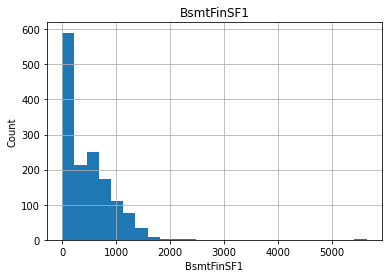

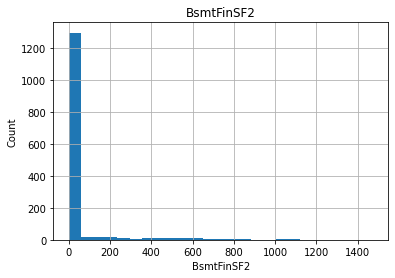

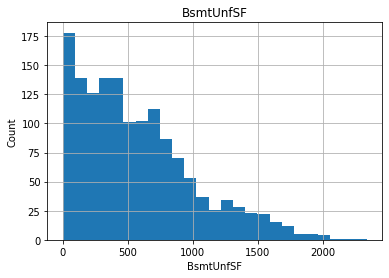

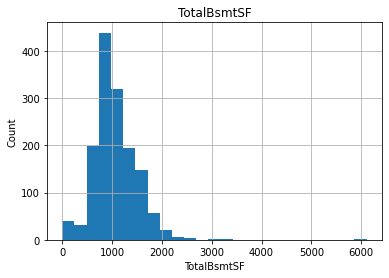

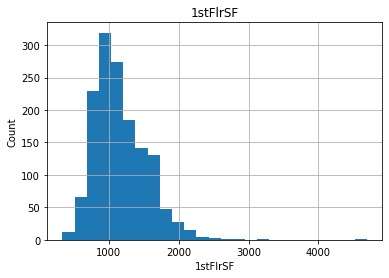

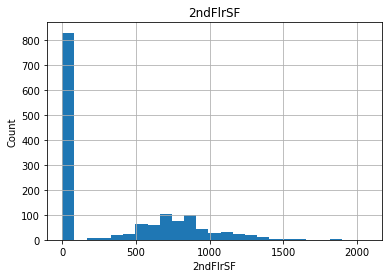

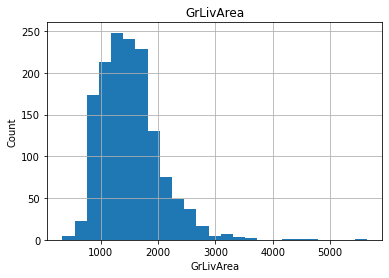

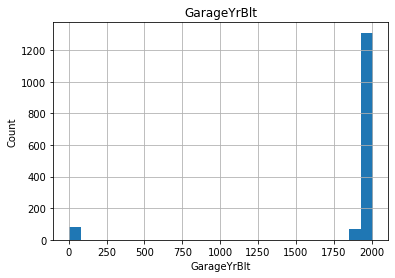

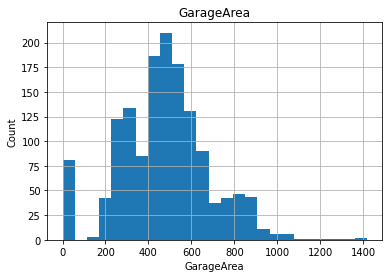

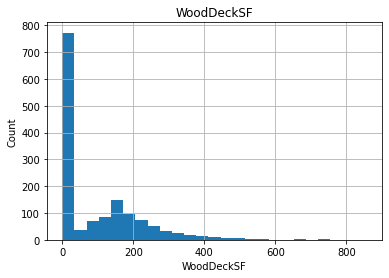

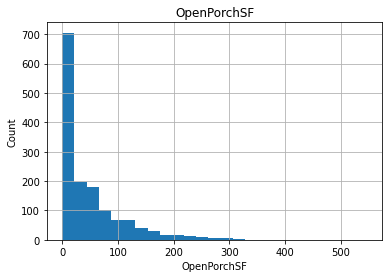

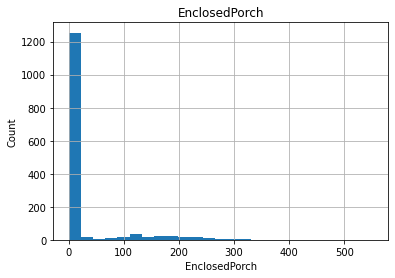

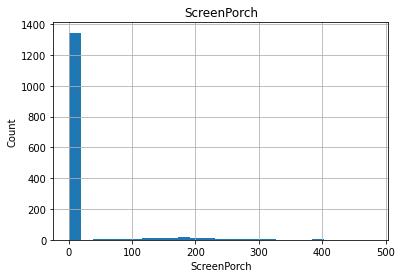

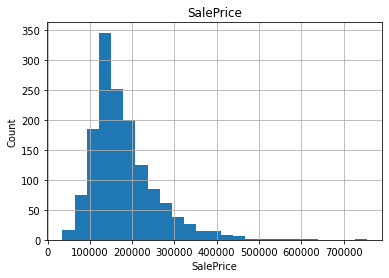

In [20]:
for feature in continuous_feature:
    data=d_train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [21]:
corr = d_train.corr()
corr.sort_values(['SalePrice'] ,ascending=False, inplace=True)
corr.SalePrice.head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [22]:
d_train.isna().sum().sort_values(ascending=False).head(20)

Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
BsmtHalfBath    0
MSSubClass      0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
CentralAir      0
GarageType      0
GarageYrBlt     0
dtype: int64

In [23]:
label = LabelEncoder()
for i in d_train.columns:
    if d_train[i].dtypes == object:
        d_train[i]= label.fit_transform(d_train[i])


In [24]:
X = d_train.drop('SalePrice', axis=1)
y = d_train['SalePrice']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

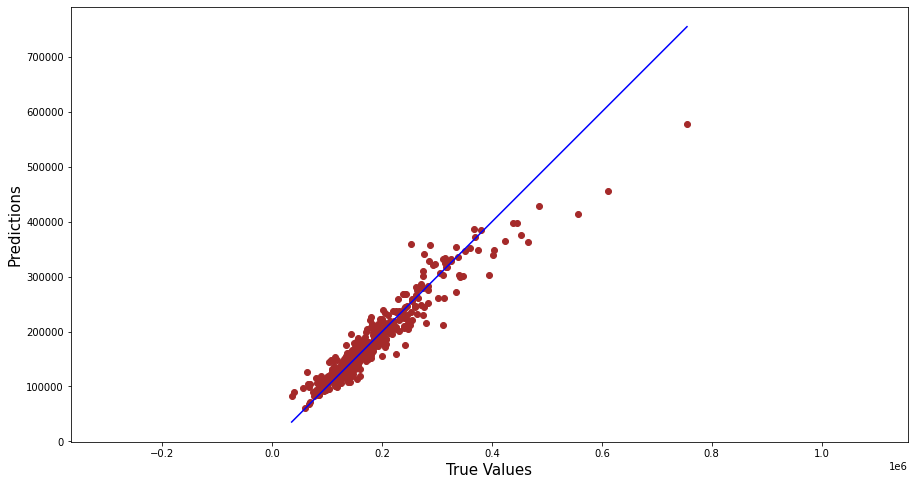

R2_score:  0.9024452925228796
model: RandomForestRegressor()
RMSE: 0.139
MAE: 16427.401
------------------------------ 



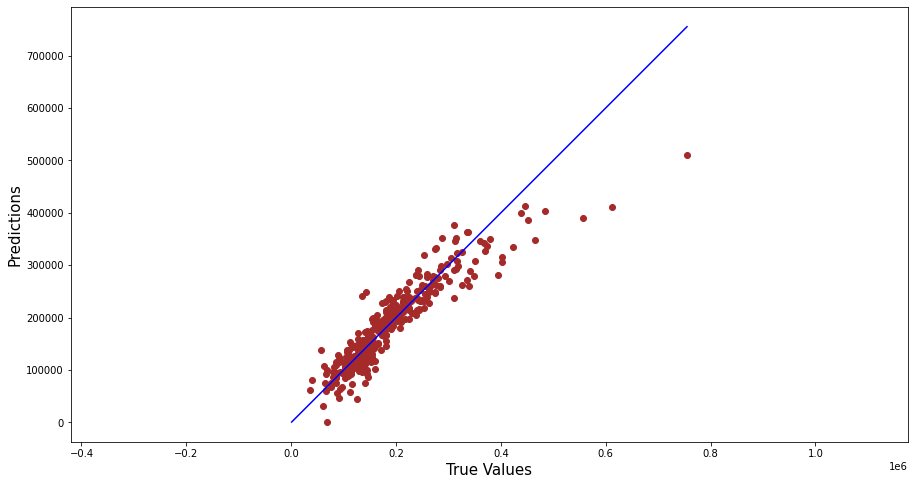

R2_score:  0.8467268488767837
model: LinearRegression()
RMSE: 0.277
MAE: 21797.171
------------------------------ 



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.872e+11, tolerance: 6.151e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


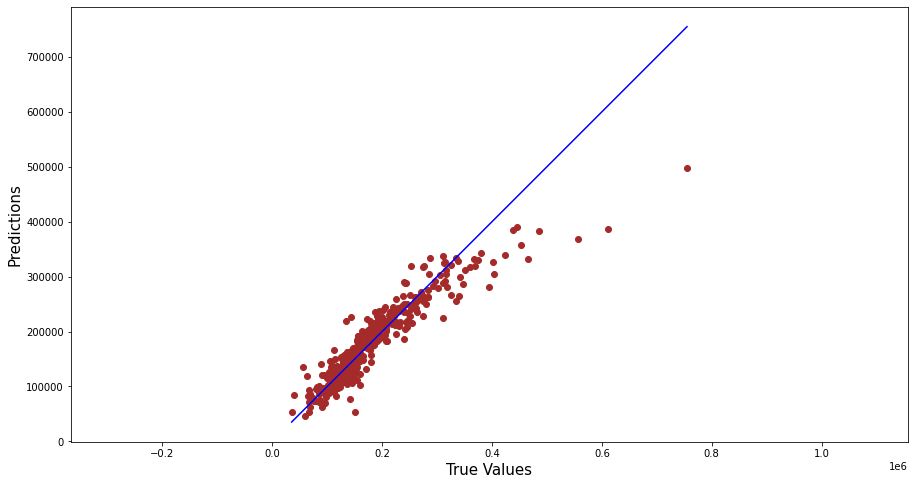

R2_score:  0.8502220831984767
model: ElasticNet()
RMSE: 0.162
MAE: 20051.489
------------------------------ 



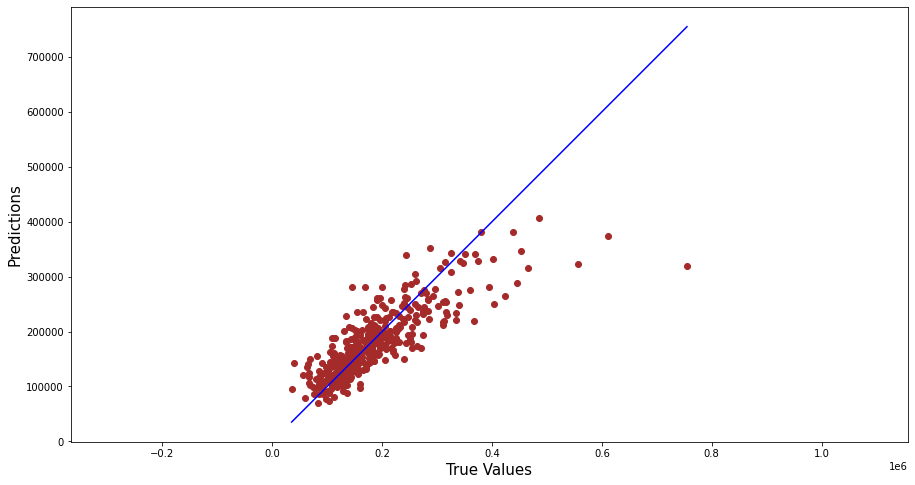

R2_score:  0.6748692476534716
model: KNeighborsRegressor()
RMSE: 0.232
MAE: 29896.737
------------------------------ 



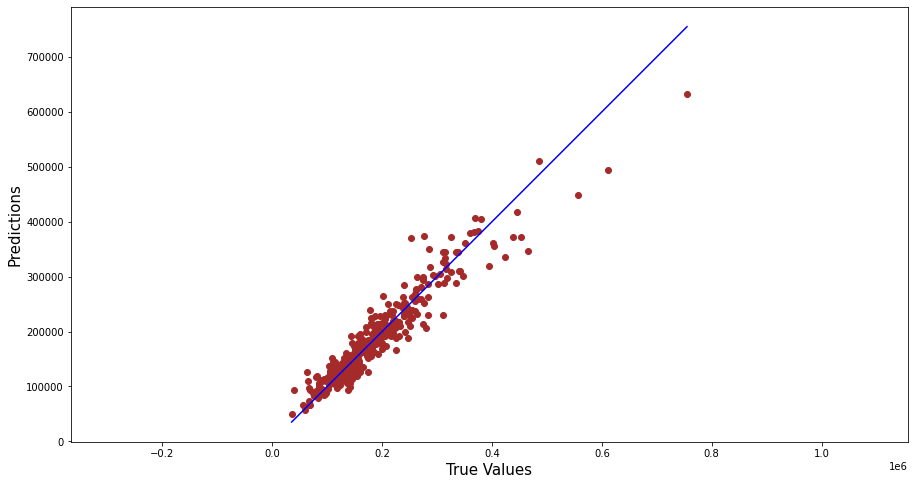

R2_score:  0.9086619987045044
model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
RMSE: 0.135
MAE: 16926.93
------------------------------ 



In [26]:
models = [RandomForestRegressor(), LinearRegression(),ElasticNet(), KNeighborsRegressor(),xgb.XGBRegressor()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    plt.figure(figsize=(15,8))
    plt.scatter(y_test,y_pred,cmap='Paired',c='brown')
    p1 = max(max(y_pred), max(y_test))
    p2 = min(min(y_pred), min(y_test))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
    print('R2_score: ', r2_score(y_test,y_pred))
    print(f'model: {str(m)}')
    print(f'RMSE: {round(np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred))), 3)}')
    print(f'MAE: {round(mean_absolute_error(y_test, y_pred), 3)}')
    print('-'*30, '\n')
    

In [27]:
clf = xgb.XGBRegressor()
parametres={'base_score':[0.1],
            'learning_rate':[0.1],
           'max_depth':[5,6,7],
           'n_estimators':[100,90,110]}
grid_search_cv_clf=GridSearchCV(clf,parametres,cv=5)
grid_search_cv_clf.fit(X_train,y_train)
best_clf1=grid_search_cv_clf.best_estimator_
y_pred1=best_clf1.predict(X_test)
print(f'RMSE: {round(np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred))), 3)}')


RMSE: 0.135


In [28]:
clf1 = RandomForestRegressor()
parametres={'max_depth':[1,2,4,8],
           'min_samples_split':[2,4,8],
           'n_estimators':[10,20,40,80],
           'n_jobs':[-1]}
grid_search_cv_clf=GridSearchCV(clf1,parametres,cv=5)
grid_search_cv_clf.fit(X_train,y_train)
best_clf2=grid_search_cv_clf.best_estimator_
y_pred2=best_clf2.predict(X_test)
print(f'RMSE: {round(np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred))), 3)}')

RMSE: 0.135


In [29]:
d_test.shape

(1459, 80)

In [30]:
d_test.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [31]:
d_test['KitchenQual'].dtype

dtype('O')

In [32]:
d_test=d_test.drop(['MiscFeature','Fence','PoolQC','Alley','FireplaceQu'],axis=1)

In [33]:
# Impute "LotFrotage" column with its mean values

d_test['LotFrontage'] = d_test['LotFrontage'].fillna(d_test['LotFrontage'].mean())
d_test['GarageCars'] = d_test['GarageCars'].fillna(d_test['GarageCars'].mean())
d_test['BsmtUnfSF'] = d_test['BsmtUnfSF'].fillna(d_test['BsmtUnfSF'].mean())
d_test['GarageArea'] = d_test['GarageArea'].fillna(d_test['GarageArea'].mean())



In [34]:
# Filling these columns with zero values

d_test['GarageYrBlt']= d_test['GarageYrBlt'].fillna(0)
d_test['MasVnrArea']= d_test['MasVnrArea'].fillna(0)

In [35]:

d_test['GarageCond'] = d_test['GarageCond'].fillna(d_train['GarageCond'].value_counts().idxmax())
d_test['GarageType'] = d_test['GarageType'].fillna(d_train['GarageType'].value_counts().idxmax())
d_test['GarageFinish'] = d_test['GarageFinish'].fillna(d_train['GarageFinish'].value_counts().idxmax())
d_test['GarageQual'] = d_test['GarageQual'].fillna(d_train['GarageQual'].value_counts().idxmax())
d_test['BsmtFinType2'] = d_test['BsmtFinType2'].fillna(d_train['BsmtFinType2'].value_counts().idxmax())
d_test['BsmtExposure'] = d_test['BsmtExposure'].fillna(d_train['BsmtExposure'].value_counts().idxmax())
d_test['BsmtQual'] = d_test['BsmtQual'].fillna(d_train['BsmtQual'].value_counts().idxmax())
d_test['BsmtCond'] = d_test['BsmtCond'].fillna(d_train['BsmtCond'].value_counts().idxmax())
d_test['BsmtFinType1'] = d_test['BsmtFinType1'].fillna(d_train['BsmtFinType1'].value_counts().idxmax())
d_test['MasVnrType'] = d_test['MasVnrType'].fillna(d_train['MasVnrType'].value_counts().idxmax())
d_test['Electrical'] = d_test['Electrical'].fillna(d_train['Electrical'].value_counts().idxmax())
d_test['MSZoning'] = d_test['MSZoning'].fillna(d_train['MSZoning'].value_counts().idxmax())
d_test['BsmtHalfBath'] = d_test['BsmtHalfBath'].fillna(d_train['BsmtHalfBath'].value_counts().idxmax())
d_test['Utilities'] = d_test['Utilities'].fillna(d_train['Utilities'].value_counts().idxmax())
d_test['Functional'] = d_test['Functional'].fillna(d_train['Functional'].value_counts().idxmax())
d_test['BsmtFullBath'] = d_test['BsmtFullBath'].fillna(d_train['BsmtFullBath'].value_counts().idxmax())
d_test['BsmtFinSF1'] = d_test['BsmtFinSF1'].fillna(d_train['BsmtFinSF1'].value_counts().idxmax())
d_test['Exterior2nd'] = d_test['Exterior2nd'].fillna(d_train['Exterior2nd'].value_counts().idxmax())
d_test['TotalBsmtSF'] = d_test['TotalBsmtSF'].fillna(d_test['TotalBsmtSF'].value_counts().idxmax())
d_test['SaleType'] = d_test['SaleType'].fillna(d_test['SaleType'].value_counts().idxmax())
d_test['BsmtFinSF2'] = d_test['BsmtFinSF2'].fillna(d_test['BsmtFinSF2'].value_counts().idxmax())
d_test['KitchenQual'] = d_test['KitchenQual'].fillna(d_test['KitchenQual'].value_counts().idxmax())
d_test['Exterior1st'] = d_test['Exterior1st'].fillna(d_test['Exterior1st'].value_counts().idxmax())

In [36]:
label = LabelEncoder()
for x in d_test.columns:
    if d_test[x].dtypes == object:
        d_test[x]= label.fit_transform(d_test[x].astype(str))

In [37]:
xgboost =  xgb.XGBRegressor()
xgboost.fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(d_test)
y_pred_xgboost.shape

(1459,)

In [38]:
y_pred_xgboost

array([134705.67, 146717.05, 195025.03, ..., 159636.03, 111419.94,
       209389.52], dtype=float32)

In [39]:
id_test = d_test['Id']
d_test = pd.DataFrame(d_test, columns=['ID'])

In [40]:
prediction = pd.DataFrame(y_pred_xgboost, columns=["SalePrice"])

In [41]:
output = pd.concat([id_test, prediction],axis=1)

In [42]:
output 

,Id,SalePrice
0,1461,134705.671875
1,1462,146717.046875
2,1463,195025.031250
3,1464,194525.625000
4,1465,194260.078125
...,...,...
1454,2915,73135.039062
1455,2916,81827.718750
1456,2917,159636.031250
1457,2918,111419.937500


In [43]:
submissions=output.rename(columns={0:'SalePrice'})

In [44]:
submissions.to_csv('submissionhouse.csv', index=False)
